In [3]:
from django.http import HttpResponse
from django.shortcuts import render
import pathlib
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from os import path
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import ImageColorGenerator
import re
import pickle
import joblib
import spacy
import nltk
from nltk.corpus import stopwords
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import string
# nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime
import warnings
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from bs4 import BeautifulSoup
from gensim.models import CoherenceModel
from gensim import corpora, models
import plotly.express as px

#from mysite.forms import twitterForm
#PATH = pathlib.Path(__file__).parent
#DATA_PATH = PATH.joinpath("../datasets").resolve()

In [13]:
def predict_topic(tweet):
        lda_model4 = models.LdaModel.load('/mnt/e/hackathon/hackthon/mysite/datasets/lda_model4.model')

        # preprocess data
        def preprocess(text):
            stopwords = set(STOPWORDS)
            stopwords.update(["american", "air", "airline", "thank", "united", "us", "airways", "virgin", "america", "jetblue", "youre", "extremely",
                              "usairway", "usairways", "flight", "americanair", "southwestair", "southwestairlines", "arbitrarily", "dream", "crazy",
                              "southwestairway", "southwestairways", "virginamerica", "really", "will", "going", "thanks", "thankyou", "passengersdont",
                              "please", "got", "let", "take", "help", "already", "never", "now", "told", "guy", "new", "sure", "still", "amp", "continue",
                              "plane", "tell", "ye", "trying", "yes", "guy", "much", "appreciate", "thx", "back", "ok", "good", "credit", "aacom",
                              "flying", "love", "great", "awesome", "see", "nice", "alway", "httptcojwl26g6lrw", "dontflythem", "motherinlaw", "night",
                              "nogearnotraining", "seriously", "didnt", "coudnt", "cant", "wont", "dont", "wat", "buffaloniagara", "hasshe", "morning",
                              "woulda", "people", "try", "youve", "youd", "yours", "flightled", "tomorrow", "today", "wat", "jfkyou", "flite", "cause",
                              "flightr", "flight", "need", "hours", "nooooo", "like", "doesnt", "right", "talk", "tweet", "mention", "pbijfk", "ridiculuous",
                              "wasnt", "suppose", "want", "understand", "come", "work", "worse", "treat", "think", "know", "worst", "paulo", "staduim",
                              "wouldnt", "stay", "away", "wont", "werent", "happen", "sorry", "havent", "tonight", "drive", "life", "thing", "aa951",
                              "whats", "theyre", "better", "thats", "allow", "hope", "stop", "cool", "niece", "happy", "word", "customercant",
                              "suck", "sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "weekend", "ruin", "shouldnt",
                              "miami", "los angeles", "new york", "chicago", "dallas", "apparently", "itover", "someones", "savannah", "lucymay",
                              "betterother", "instead", "look", "hopefully", "yesterday", "antonio", "unacceptable", "folks", "record", 'arent',
                              "miss", "hang", "wrong", "stick", "grind", "tarmac", "theres", "forget", "terrible", "clothe", "terrible", "break",
                              "actually", "frustrate", "correct", "ridiculous", "expect", "different", "pathetic", "bother", "follow", "fault",
                              "impossible", "point", "cover", "person", "ask", "speak", "things", "earlier", "mean", "select", "minutes",
                              "unite", "horrible", "country", "leave", "speak", "apologize", "faster", "hop", "confuse", "lose", "flightd", "hear",
                              "literally", "years", "surprise", "bump", "fail", "compensate", "hand", "helpful", "upset", "friend", "excuse", "claim",
                              "situation", "multiple", "weather", "choose", "company", "believe", "question", "kick", "anymore", "awful", "delta",
                              "dozen", "medical", "completely", "finally", "waste", "shock", "annoy", "maybe", "strand", "mess", "finally",
                              "plan", "place", "apology", "center", "plan", "twitter", "promise", "prefer", "count", "maybe", "shock", "longer", "meet",
                              "important", "drop"])
            #stopwords.update([i for i in ts])
            # stopwords.update([str(i).lower() for i in cities.City]) #removing City names in US
            # remove words after tags --> usually twitter account
            r = re.compile(r'(?<=\@)(\w+)')
            ra = re.compile(r'(?<=\#)(\w+)')  # remove words after hashtags
            ro = re.compile(r'(flt\d*)')  # remove words after flight number
            names = r.findall(text.lower())
            hashtag = ra.findall(text.lower())
            flight = ro.findall(text.lower())
            lmtzr = WordNetLemmatizer()

            def stem_tokens(tokens, lemmatize):
                lemmatized = []
                for item in tokens:
                    lemmatized.append(lmtzr.lemmatize(item, 'v'))
                return lemmatized

            def deEmojify(inputString):
                return inputString.encode('ascii', 'ignore').decode('ascii')

            #doc = nlp(text)
            text = deEmojify(text)
            soup = BeautifulSoup(text)
            text = soup.get_text()
            text = "".join([ch.lower()
                           for ch in text if ch not in string.punctuation])
            tokens = nltk.word_tokenize(text)
            # remove words with character length below 2
            tokens = [ch for ch in tokens if len(ch) > 4]
            # remove words with character length above 15
            tokens = [ch for ch in tokens if len(ch) <= 15]
            lemm = stem_tokens(tokens, lmtzr)
            lemstop = [i for i in lemm if i not in stopwords]
            lemstopcl = [i for i in lemstop if i not in names]
            lemstopcl = [i for i in lemstopcl if i not in hashtag]
            lemstopcl = [i for i in lemstopcl if i not in flight]
            lemstopcl = [i for i in lemstopcl if not i.isdigit()]
            #lemstopcl1 = [i for i in lemstopcl if i not in t]
            return lemstopcl

        id2word = corpora.Dictionary.load("/mnt/e/hackathon/hackthon/mysite/datasets/id2word.dict")

        bow_vector = id2word.doc2bow(preprocess(tweet))
        result = lda_model4.get_document_topics(bow_vector)
        resultdict = dict(result)
        orddict = sorted(resultdict, key=resultdict.get, reverse=True)

        Keymax = 1
        if resultdict[orddict[0]]-resultdict[orddict[1]] <= .08:
            Keymax += orddict[1]
            Predicted_topic = orddict[1]+1
            Probability_Score = resultdict[orddict[0]]
        else:
            Keymax += orddict[0]
            Predicted_topic = orddict[0]+1)
            Probability_Score = resultdict[orddict[0]])

        if Keymax == 1:
            print('Delay and Customer Service')
        elif Keymax == 2:
            print('Baggage Issue')
        elif Keymax == 3:
            print('Reschedule and Refund')
        elif Keymax == 4:
            print('Phone and Online Booking')
        elif Keymax == 5:
            print('Reservation Issue')
        elif Keymax == 6:
            print('Seating Preferences')
        elif Keymax == 7:
            print('Extra Charges')
        else:
            print('Customer Experience')
        print("\n")

        df = pd.DataFrame(resultdict.items())
        df[0] = df[0]+1

        if Keymax == orddict[1]+1:
            temp = df.iloc[orddict[0], 1]
            df.iloc[orddict[0], [1]] = df.iloc[Keymax-1, 1]
            df.iloc[Keymax-1, [1]] = temp
        else:
            df[1] = df[1]

        colors = ['#3f5994', '#8cbcfb', '#c9e5fa', '#f4dad0',
                  "#f8bc99", '#f3aa84', '#f49c6c', "#c48771"]
        plt.style.use('ggplot')
        plt.figure()
        plt.title("Topic Probability Score", size=48)
        plt.xticks(rotation=20, size=30)
        plt.yticks(size=30)
        ax = sns.barplot(x=df[0], y=df[1], palette=colors)
        plt.ylabel('Probability Score', fontsize=35)
        plt.xlabel('Topics', fontsize=35)
        
        for index, score in resultdict.items():
            print("Score: {}\n Topic: {}\n Keywords:{} \n".format(score, index+1, lda_model4.print_topic(index)))
            

Predicted topic:  8
Probability Score:  0.29527867
Customer Experience


Score: 0.2952786684036255
 Topic: 1
 Keywords:0.086*"service" + 0.064*"customer" + 0.062*"delay" + 0.049*"ticket" + 0.041*"rebooked" + 0.035*"agents" + 0.028*"email" + 0.026*"response" + 0.019*"passengers" + 0.019*"reason" 

Score: 0.09776436537504196
 Topic: 2
 Keywords:0.130*"wait" + 0.109*"airport" + 0.055*"baggage" + 0.050*"sit" + 0.028*"passenger" + 0.020*"receive" + 0.019*"information" + 0.019*"load" + 0.018*"depart" + 0.012*"counter" 

Score: 0.1660994291305542
 Topic: 3
 Keywords:0.301*"cancel" + 0.033*"staff" + 0.024*"fly" + 0.022*"assistance" + 0.021*"reschedule" + 0.021*"hotel" + 0.020*"refund" + 0.015*"offer" + 0.014*"money" + 0.012*"airports" 

Score: 0.10999934375286102
 Topic: 4
 Keywords:0.195*"phone" + 0.083*"change" + 0.066*"online" + 0.057*"book" + 0.035*"problems" + 0.020*"handle" + 0.019*"option" + 0.016*"contact" + 0.015*"attempt" + 0.011*"ignore" 

Score: 0.038286320865154266
 Topic: 5
 Keyw

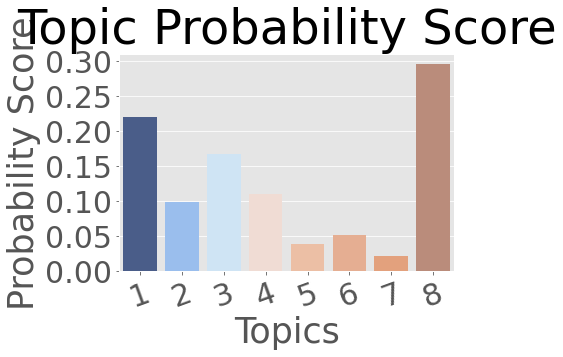

In [15]:
predict_topic("abcd")

In [1]:
import pandas as pd
sample = pd.read_csv("/mnt/e/hackathon/hackthon/mysite/datasets/travelverse-dataset.csv")

tf_1=sample["'ORIGIN'"].unique()
tf_2=sample["'COUNTRY'"].unique()
tf_3=sample["'TICKETING_AIRLINE'"].unique()
tf_4=sample["'DESTINATION'"].unique()

origin_choice = list(zip(tf_1,tf_1))
country_choice = list(zip(tf_2,tf_2))
ticketing_airline_choice = list(zip(tf_3,tf_3))
destination_choice = list(zip(tf_4,tf_4))

In [3]:
tf_1

array(["'CGO'", "'CTU'", "'BHY'", ..., "'JIU'", "'LSP'", "'HMV'"],
      dtype=object)

In [4]:
tf_2

array(["'CN'", "'MY'", "'HK'", "'IN'", "'AU'", "'KR'", "'PK'", "'SG'",
       "'JP'", "'CA'", "'CO'", "'GB'", "'RU'", "'TW'", "'GR'", "'AE'",
       "'SA'", "'DE'", "'PH'", "'ID'", "'KW'", "'FR'", "'BR'", "'MX'",
       "'VN'", "'ES'", "'BD'", "'IT'", "'NL'", "'US'", "'AT'", "'SE'",
       "'IE'", "'QA'", "'BE'", "'FI'", "'AR'", "'ZA'", "'TR'", "'EG'",
       "'DK'", "'PT'", "'CH'", "'NZ'", "'PL'", "'NO'", "'CL'", "'PE'",
       "'IL'"], dtype=object)

In [5]:
tf_3

array(["'Chengdu Airlines                        '",
       "'Malindo Airways Sdn Bhd                 '",
       "'Air Seoul  Inc                          '",
       "'China United Airlines                   '",
       "'TianJin Airlines Co. Ltd                '",
       "'Bangkok Airways Public Co.  Ltd.        '",
       "'Kunming Airlines Co.  Ltd.              '",
       "'Hebei Airlines Co.  Ltd.                '",
       "'WestJet                                 '",
       "'ABC Aerolineas S.A. de C.V.             '",
       "'West Air Co.  Ltd.                      '",
       "'Joint Stock Company Aircompany          '",
       "'Hong Kong Airlines Limited              '",
       "'Changan Airlines Limited Company        '",
       "'Lucky Air Co. Ltd.                      '",
       "'Hunnu Air LLC                           '",
       "'Okay Airways Company Limited            '",
       "'LongJiang Airlines Co. Ltd.             '",
       "'Suparna Airlines Co.  Ltd.           

In [6]:
tf_4

array(["'SYX'", "'CGO'", "'CKG'", ..., "'JIU'", "'SHS'", "'KOV'"],
      dtype=object)

In [ ]:
<select name="origin">
                {% for i in origin_choice %}
                <option value="{{ i }}">{{ i }}</option>
                {% endfor %}
            </select>
            <select name="country">
                {% for i in country_choice %}
                <option value="{{ i }}">{{ i }}</option>
                {% endfor %}
            </select>
            <select name="ticketing_airline">
                {% for i in ticketing_airline_choice %}
                <option value="{{ i }}">{{ i }}</option>
                {% endfor %}
            </select>
            <select name="destination">
                {% for i in destination_choice %}
                <option value="{{ i }}">{{ i }}</option>
                {% endfor %}
            </select>
            <input type="submit" value="save"/>  
        {% endblock %}